# WEIGHT PREDICTION USING LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### DATA DESCRIPTION:

In [2]:
df=pd.read_csv('HeightWeight.csv')

In [3]:
df.sample(5)

,Height(Inches),Weight(Pounds)
18688,65.73213,94.24776
16506,70.19919,135.13800
2330,69.26795,137.50010
12156,66.27501,100.11480
6335,69.24424,141.30370


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [5]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


### DATA EXPLORATION:

In [6]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,Height(Inches),Weight(Pounds)


array([[<AxesSubplot:title={'center':'Height(Inches)'}>,
        <AxesSubplot:title={'center':'Weight(Pounds)'}>]], dtype=object)

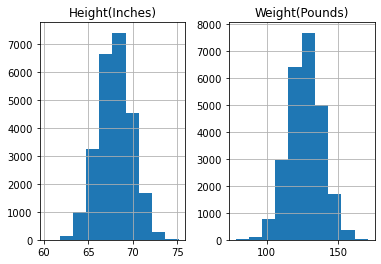

In [8]:
df.hist()

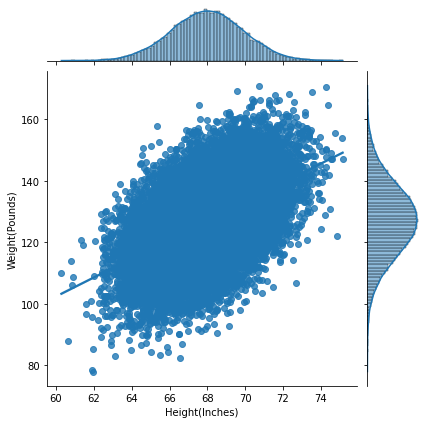

In [9]:
sns.jointplot(y ='Weight(Pounds)', x ='Height(Inches)', data = df, kind ='reg')

In [10]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


<AxesSubplot:xlabel='Height(Inches)'>

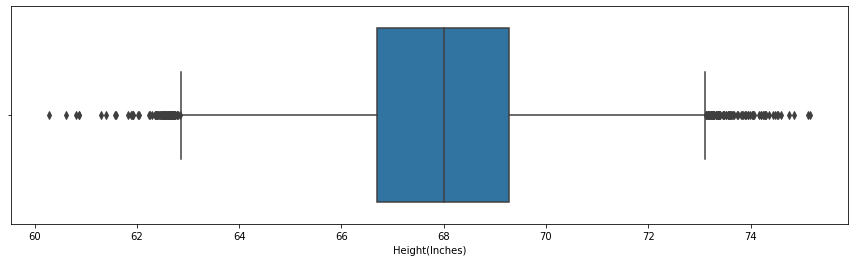

In [11]:
plt.figure(figsize=(15, 4))
sns.boxplot(x=df['Height(Inches)'])

<AxesSubplot:xlabel='Weight(Pounds)'>

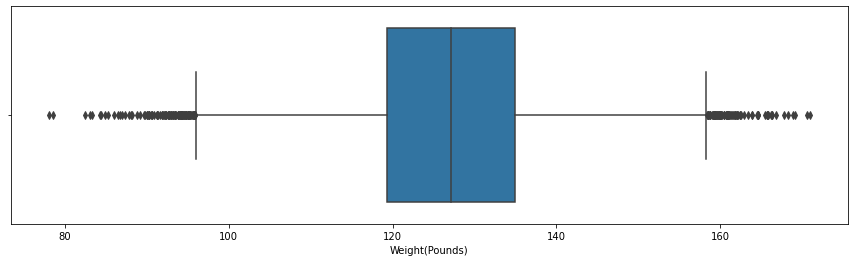

In [12]:
plt.figure(figsize=(15, 4))
sns.boxplot(x=df['Weight(Pounds)'])

### LINEAR REGRESSION MODELLING:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [14]:
X = df.iloc[:,0:1]
y = df['Weight(Pounds)'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
print(f"""
Shape of X Train: {X_train.shape}
Shape of Y Train: {y_train.shape}
Shape of X Test:  {X_test.shape}
Shape of Y Test:  {y_test.shape}
""")


Shape of X Train: (17500, 1)
Shape of Y Train: (17500,)
Shape of X Test:  (7500, 1)
Shape of Y Test:  (7500,)



In [16]:
from sklearn.linear_model import LinearRegression
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_train_pred = linear_reg_model.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [17]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,0.251352
MAE,8.038325
MSE,101.295442
RMSE,10.064564


In [18]:
y_pred = linear_reg_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [19]:
R2 = metrics.r2_score(y_test , y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,0.256152
MAE,8.034998
MSE,102.281591
RMSE,10.113436


In [20]:
Prediction = {'Actual Weight' : np.array(y_test), 
            'Predicted Weight' : np.array(y_pred).flatten(),
           }

Prediction = pd.DataFrame(Prediction)

Prediction.sample(5)

,Actual Weight,Predicted Weight
6787,129.6272,126.111156
5909,107.0743,118.069707
4544,133.7865,140.419033
5620,118.0806,119.460100
4805,121.5935,128.593430


Text(0.5, 1.0, 'Scatter Plot for Predition')

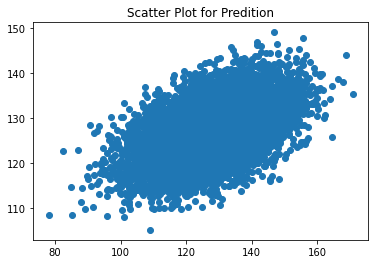

In [21]:
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot for Predition')

In [22]:
pd.DataFrame(linear_reg_model.coef_, X.columns, columns = ['Coefficient'])

,Coefficient
Height(Inches),3.075547


In [23]:
print("The intercept of the regression equation is:",linear_reg_model.intercept_)

The intercept of the regression equation is: -82.08688527625162


Regresion Line Equation: y = 3.075x - 80.086

In [24]:
height = float(input("Enter Height(in inches): "))
result = linear_reg_model.predict([[height]])
print("Predicted Weight(in lbs)",result)

Enter Height(in inches): 70
Predicted Weight(in lbs) [133.20143054]
